/tmp/ipykernel_61027/3865161143.py:23: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(InputPath + FileName + InputFileExt)
/tmp/ipykernel_61027/3865161143.py:33: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(OutputPath + FileName + OutputFileExt,header=None)


Length = 86400 -- Good data!
             TIMESTAMP  Hour  BattVolt  PTemp  AirTemp     Rh  SBTemp_1360  \
0  2023-08-23 00:00:01     0     11.74  24.36    27.20  61.97        26.00   
1  2023-08-23 00:00:02     0     11.74  24.36    27.20  61.97        25.99   
2  2023-08-23 00:00:03     0     11.74  24.36    27.21  62.03        26.00   
3  2023-08-23 00:00:04     0     11.74  24.36    27.20  62.03        26.00   
4  2023-08-23 00:00:05     0     11.74  24.36    27.24  62.07        26.00   

   TargTemp_1360  TmV_1360  PAR       CO2       H2O wind_speed wind_direction  \
0          23.18 -0.144978  0.0  491.1735  25.61078       0.67            149   
1          23.22 -0.142849  0.0  491.9357  25.61073        0.6            153   
2          23.19 -0.144358  0.0  497.9702  25.61073       0.53            143   
3          23.20 -0.143739  0.0  497.9688  25.62601       0.62            133   
4          23.26 -0.140821  0.0  502.0950  25.62590       0.63            147   

  diag  Incomin

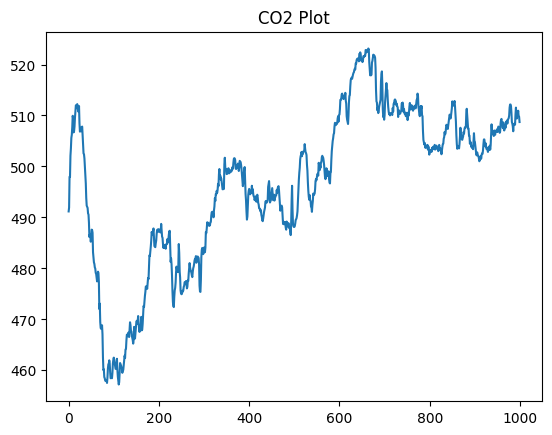

In [3]:
#Try with bad data -- 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

############Configurable Parameters#############
FileName = "TOA5_50453_CO2_77_2023_265_0929"
InputPath = "FromPramod/Staton8/bad/"  #"FromPramod/Staton8/good/TOA5_50453_CO2_44_2023_235_0000.dat"
InputFileExt = ".dat"
LengthToPlot = 86400  #Max = 86400
WhichColumnToDisplay = "CO2"  #"CO2"  #BattVolt 


############COnstant Parameters#############
OutputPath = InputPath + "/OutFiles/"
OutputFileExt = ".csv"
OutputCleanedExt = "_Cleaned.csv"
MaxLength = 86400


#Read Input file and convert to csv
df = pd.read_csv(InputPath + FileName + InputFileExt)
# df = pd.read_csv("FromPramod/Station3/TOA5_50455_CO2_56_2023_257_0000.dat")

#check if output path exists , if no create it
if not (os.path.exists(OutputPath)):
    os.makedirs(OutputPath)
    print("Creating New Directory- OutFiles")

df.to_csv(OutputPath + FileName + OutputFileExt)

df2 = pd.read_csv(OutputPath + FileName + OutputFileExt,header=None)
# print(df2.head(2))

#Drop index 1,3,4 -- ie, 0,2,3
df2_drop = df2.drop([df2.index[0], df2.index[2],df2.index[3]])
# print(df2_drop.head(4))

#Assign new header as columns
new_header = df2_drop.iloc[0]
df2_drop = df2_drop[1:]
df2_drop.columns = new_header
df_new = df2_drop.reset_index(drop=True)
# print(df2_drop.head(4))
# print(df_new.head(3))

#Check the length of data = 86400 ie, 24*60*60 secs in a day
LengthOfData = df_new["TIMESTAMP"].count()
if( df_new["TIMESTAMP"].count() < MaxLength):
    TotalLengthOfBadData = df_new["TIMESTAMP"].count()
    print("Max length of data = {}".format(LengthToPlot))
    if LengthToPlot > TotalLengthOfBadData :
        LengthToPlot = TotalLengthOfBadData
    
elif df_new["TIMESTAMP"].count() == MaxLength:
    print("Length = 86400 -- Good data!")
else:
    print("Length > MaxLength -- Freq>1 Hz !!!")
    exit(-1)


# columnsToDrop = ["RECORD","Year", "Month","Day_of_Month","Day_of_Week","Day_of_Year","Hour","Minute","Second"]
columnsToDrop = ["RECORD","Year", "Month","Day_of_Month","Day_of_Week","Day_of_Year","Minute","Second"]
df_Clean = df_new.drop(columnsToDrop, axis=1)
# print(df_Clean.count())

df_Clean.to_csv(OutputPath + FileName + OutputCleanedExt)



#dataframes available : 
df_Clean = pd.read_csv(OutputPath + FileName + OutputCleanedExt)
# print(df_Clean.head(5))
#Delte first 
df_Clean = df_Clean.loc[:,~df_Clean.columns.str.contains('^Unnamed')]
print(df_Clean.head(5))

#Plot CO2
df_WhichColumn = df_Clean[WhichColumnToDisplay]
df_WhichColumn_Small = df_WhichColumn[:LengthToPlot]
df_WhichColumn_Small.plot()


plt.title(WhichColumnToDisplay + " Plot")
plt.savefig(OutputPath + FileName + "_" + WhichColumnToDisplay + "_Plot.png")
plt.show()

In [4]:
#Try with bad data -- 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os



############COnstant Parameters#############
OutputPath = InputPath + "/OutFiles/"
OutputFileExt = ".csv"
OutputCleanedExt = "_Cleaned.csv"
MaxLength = 86400

############Configurable Parameters#############
FileName = "TOA5_50453_CO2_77_2023_265_0929"
InputPath = "FromPramod/Staton8/bad/"  #"FromPramod/Staton8/good/TOA5_50453_CO2_44_2023_235_0000.dat"
InputFileExt = ".dat"
LengthToPlot = 86400  #Max = 86400
WhichColumnToDisplay = "CO2"  #"CO2"  #BattVolt 




#Read Input file and convert to csv
# df = pd.read_csv(InputPath + FileName + InputFileExt)
# # df = pd.read_csv("FromPramod/Station3/TOA5_50455_CO2_56_2023_257_0000.dat")

# #check if output path exists , if no create it
# if not (os.path.exists(OutputPath)):
#     os.makedirs(OutputPath)
#     print("Creating New Directory- OutFiles")

# df.to_csv(OutputPath + FileName + OutputFileExt)

df_Clean = pd.read_csv(OutputPath + FileName + OutputCleanedExt)
print(df_Clean.head(5))

# resampel
# df5min = df_Clean.resample('5Min', on='TIMESTAMP').first().drop('TIMESTAMP', 1).reset_index()

# print(df5min.head(5))
#Resample for 1 -sec data & vlaue = NaN 
df_Clean["TIMESTAMP"] = pd.to_datetime(df_Clean["TIMESTAMP"])



   Unnamed: 0            TIMESTAMP  BattVolt  PTemp  AirTemp     Rh  \
0           0  2023-09-22 09:29:58      8.17  23.28    27.21  23.63   
1           1  2023-09-22 09:29:59      8.17  23.28    27.07  23.29   
2           2  2023-09-22 09:30:00      8.17  23.28    27.17  23.41   
3           3  2023-09-22 09:30:01      8.18  23.28    27.08  23.16   
4           4  2023-09-22 09:30:02      8.18  23.28    27.07  23.16   

   SBTemp_1360  TargTemp_1360  TmV_1360    PAR       CO2       H2O wind_speed  \
0        29.65          24.47 -0.266155  767.2  0.004254 -0.000669       0.65   
1        29.65          24.38 -0.270545  769.3  0.000130 -0.000546       0.71   
2        29.65          24.34 -0.272572  768.2  0.002119 -0.000581        0.7   
3        29.65          24.34 -0.272376  765.1  0.000656 -0.000464       0.66   
4        29.65          24.33 -0.273166  762.9  0.001963  0.000136       0.75   

  wind_direction diag  IncomingSW  OutgoingSW  IncomingLW  OutgoingLW  Albedo  
0     

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'